In [39]:
import sys
import types
import pandas as pd
from ibm_botocore.client import Config
import ibm_boto3
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
import numpy as np
import math
%matplotlib inline
#Importing relavent code libraries.

In [ ]:
#Personal keys removed

In [3]:
#A note before begining. As we are looking for a numerical prediciton, we should be looking to create a regression model. However due to how low the correlation was in the previous question, and how some variables had a cyclical and non cyclical patterns, it is likely that any model made will not be overly accurate.
#Downloading merged dataframe and pearson values for context
client_cred.download_file(Bucket=bucket,Key='df_merged_cos.pkl',Filename='./df_merged_local.pkl')
client_cred.download_file(Bucket=bucket,Key='df_pearson_cos.pkl',Filename='./df_pearson_local.pkl')

In [4]:
df_merged = pd.read_pickle('./df_merged_local.pkl')
df_merged.head()

,Lot,ZipCode,Address,LotArea,BldgArea,ResArea,OfficeArea,RetailArea,NumBldgs,NumFloors,...,BldgDepth,YearBuilt,YearAlter1,BuiltFAR,ResidFAR,CommFAR,FacilFAR,XCoord,YCoord,incident count
0,17,10454.0,144 BRUCKNER BOULEVARD,2500,10625,0,0,2125,1,5.0,...,85.0,1931,2001,4.25,6.02,5.0,6.5,1006299.0,232033.0,5
1,18,10454.0,148 BRUCKNER BOULEVARD,1875,8595,6876,0,1719,1,5.0,...,70.0,1920,2009,4.58,6.02,5.0,6.5,1006363.0,232040.0,13
2,45,10454.0,147 BRUCKNER BOULEVARD,2500,11500,9176,0,2324,1,5.0,...,96.0,1925,0,4.60,3.00,2.0,3.0,1006412.0,232154.0,99
3,72,10454.0,169 BROOK AVENUE,1700,2080,2080,0,0,1,2.0,...,52.0,2000,0,1.22,2.43,0.0,4.8,1006189.0,232909.0,1
4,73,10454.0,167 BROOK AVENUE,1700,2080,2080,0,0,1,2.0,...,52.0,2000,0,1.22,2.43,0.0,4.8,1006179.0,232892.0,1


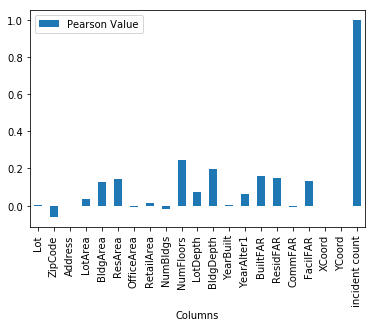

In [7]:
df_pearson=pd.read_pickle('./df_pearson_local.pkl')
df_pearson.plot(kind='bar')

In [8]:
df_pearson

,Pearson Value
Columns,
Lot,0.000331
ZipCode,-0.063169
Address,0.000000
LotArea,0.034397
BldgArea,0.125485
ResArea,0.141368
OfficeArea,-0.005495
RetailArea,0.014412
NumBldgs,-0.017703


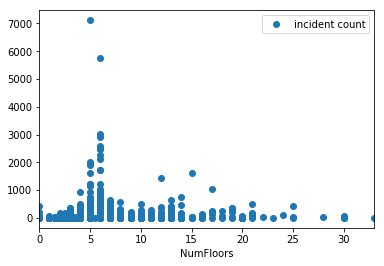

In [17]:
#By making use of the pearson values we can narrow down which categories should have some form of effect on the incident count and hopefully improve the quality of the model.
#In this case we are going to remove the categories all but incident count and number of floors as the general correlation between values is very low, and likely work on different progressions, creating a lot of noise if added together
df_formodel=df_merged.drop(columns=['Lot','ZipCode','Address','LotArea','OfficeArea','NumBldgs','LotDepth','YearBuilt','YearAlter1','CommFAR','XCoord','YCoord','RetailArea','BldgArea','ResArea','BldgDepth','BuiltFAR','ResidFAR','FacilFAR'])
df_formodel.plot(x='NumFloors',y='incident count',style='o')

In [55]:
#From the graph we can see regular peaks and troughs, suggesting a sinusoidal or other periodic function 
#In order to test for out of sample accuracy, we are going to split the sample into 4.
df_split1=np.array_split(df_formodel,4)[0]
df_split2=np.array_split(df_formodel,4)[1]
df_split3=np.array_split(df_formodel,4)[2]
df_split4=np.array_split(df_formodel,4)[3]
#Note, we could do the following steps with a loop through the different methods keeping them in a list, but this does not end up displaying well within these notebooks so we will be repeating code for each portion.
#Defining a quadratic function, as it is the closest to such a function as I am currently capable of creating
def quad(x,beta_1,beta_2,beta_3,beta_4,beta_5,beta_6,beta_7,beta_8):
    y=(beta_1+beta_2*(x)+beta_3*(x**2)+beta_4*(x**3)+beta_5*(x**4)+beta_6*(x**5)+beta_7*(x**6)+beta_8*(x**7))
    return y
#A function like this is going to make some clear overfitting, but given a lack a non-lopping relation, it will have to do.
#Taking out data and normalising

In [48]:
x_data1,y_data1=(df_split1['NumFloors'].values,df_split1['incident count'].values)
x_data_norm1=x_data1/max(x_data1)
y_data_norm1=y_data1/max(y_data1)
x_data_norm1=x_data_norm1.astype('float64')
y_data_norm1=y_data_norm1.astype('float64')


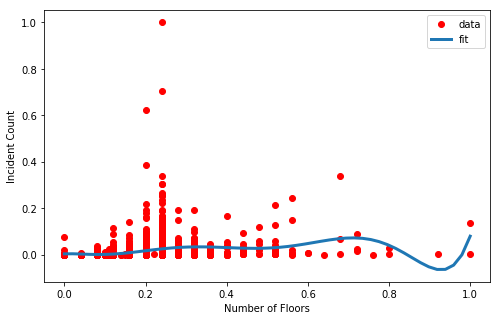

In [56]:
popt1,pcov=curve_fit(quad,x_data_norm1,y_data_norm1)
x=np.linspace(0,35)
x=x/max(x)
plt.figure(figsize=(8,5))
y=quad(x, *popt1)
plt.plot(x_data_norm1,y_data_norm1,'ro',label='data')
plt.plot(x,y, linewidth=3.0,label='fit')
plt.legend(loc='best')
plt.ylabel('Incident Count')
plt.xlabel('Number of Floors')
plt.show()

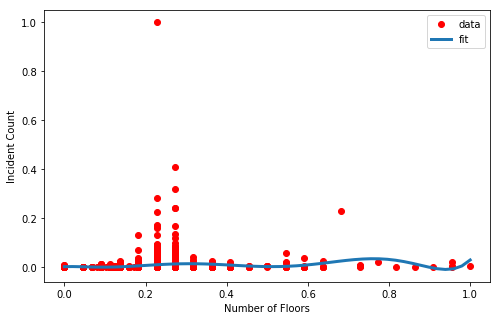

In [57]:
x_data2,y_data2=(df_split2['NumFloors'].values,df_split2['incident count'].values)
x_data_norm2=x_data2/max(x_data2)
y_data_norm2=y_data2/max(y_data2)
x_data_norm2=x_data_norm2.astype('float64')
y_data_norm2=y_data_norm2.astype('float64')
popt2,pcov=curve_fit(quad,x_data_norm2,y_data_norm2)
x=np.linspace(0,35)
x=x/max(x)
plt.figure(figsize=(8,5))
y=quad(x, *popt2)
plt.plot(x_data_norm2,y_data_norm2,'ro',label='data')
plt.plot(x,y, linewidth=3.0,label='fit')
plt.legend(loc='best')
plt.ylabel('Incident Count')
plt.xlabel('Number of Floors')
plt.show()

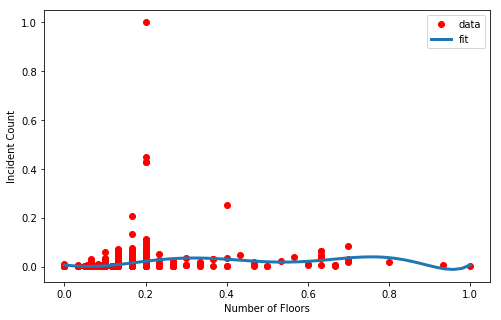

In [58]:
x_data3,y_data3=(df_split3['NumFloors'].values,df_split3['incident count'].values)
x_data_norm3=x_data3/max(x_data3)
y_data_norm3=y_data3/max(y_data3)
x_data_norm3=x_data_norm3.astype('float64')
y_data_norm3=y_data_norm3.astype('float64')
popt3,pcov=curve_fit(quad,x_data_norm3,y_data_norm3)
x=np.linspace(0,35)
x=x/max(x)
plt.figure(figsize=(8,5))
y=quad(x, *popt3)
plt.plot(x_data_norm3,y_data_norm3,'ro',label='data')
plt.plot(x,y, linewidth=3.0,label='fit')
plt.legend(loc='best')
plt.ylabel('Incident Count')
plt.xlabel('Number of Floors')
plt.show()

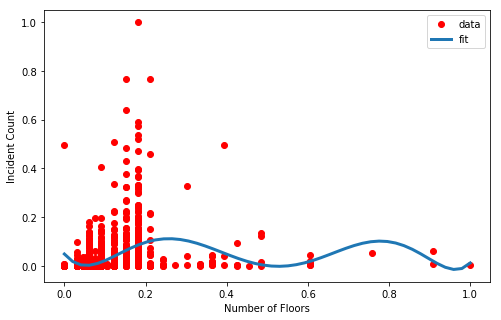

In [59]:
x_data4,y_data4=(df_split4['NumFloors'].values,df_split4['incident count'].values)
x_data_norm4=x_data4/max(x_data4)
y_data_norm4=y_data4/max(y_data4)
x_data_norm4=x_data_norm4.astype('float64')
y_data_norm4=y_data_norm4.astype('float64')
popt4,pcov=curve_fit(quad,x_data_norm4,y_data_norm4)
x=np.linspace(0,35)
x=x/max(x)
plt.figure(figsize=(8,5))
y=quad(x, *popt4)
plt.plot(x_data_norm4,y_data_norm4,'ro',label='data')
plt.plot(x,y, linewidth=3.0,label='fit')
plt.legend(loc='best')
plt.ylabel('Incident Count')
plt.xlabel('Number of Floors')
plt.show()

In [ ]:
#Without any further analysis it is clear that the current model is certainly not effective at accurately predicting what sort of data is likely to appear in the future.
#Only data set 4 had much simularility to the original set. While my model may not be a success, I do believe that it shows that with the correct formulae, it would be possible to create a model which could predict future data sets.
#As stated earlier, I would expect such data to take the form of a large spike around 5 floors, then a rapid fall off, before peaking again just before the fifth floor after that, and so on and so forth.